In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import *

# The Impact of a R7 Merchantman

The cash and eco at the end of the simulation is given by (2292.1302852799276,1039.9152959153673)


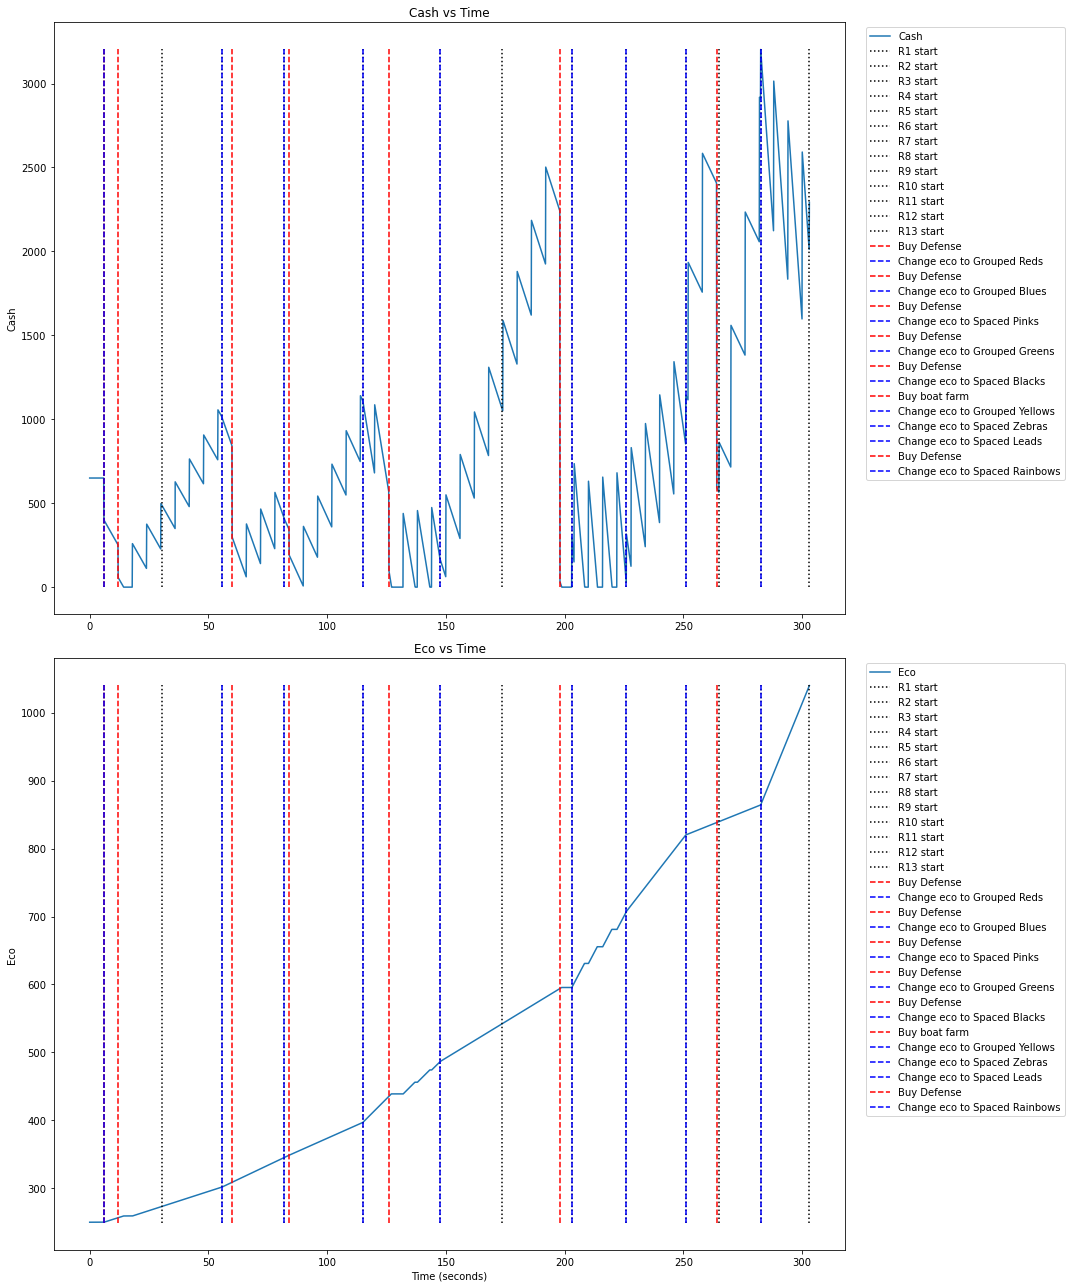

In [11]:
rounds = Rounds(0.5)

buy_queue_laser = [
    [buyDefense(500, min_buy_time = rounds.getTimeFromRound(1))], #Buy 000 Boat
    [buyDefense(450)], #Buy Quincy
    [buyDefense(850, min_buy_time = rounds.getTimeFromRound(3))], #Upgrade boat to 011 
    [buyDefense(500, min_buy_time = rounds.getTimeFromRound(4))], #Upgrade boat to 021 
    [buyDefense(900, min_buy_time = rounds.getTimeFromRound(5.25))], #Upgrade boat to 031 
    [buyBoatFarm(min_buy_time = rounds.getTimeFromRound(7))], #Buy a boat farm
    [buyDefense(2650, min_buy_time = rounds.getTimeFromRound(10))] #Buy a 300 alchemist
]

eco_queue_laser = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'),
    (rounds.getTimeFromRound(3), 'Grouped Blues'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5), 'Grouped Greens'),
    (rounds.getTimeFromRound(6), 'Spaced Blacks'),
    (rounds.getTimeFromRound(8), 'Grouped Yellows'),
    (rounds.getTimeFromRound(9), 'Spaced Zebras'),
    (rounds.getTimeFromRound(10), 'Spaced Leads'),
    (rounds.getTimeFromRound(12), 'Spaced Rainbows')
]

initial_state = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue_laser,
    'Eco Queue': eco_queue_laser
}

game_state = GameState(initial_state)
game_state.fastForward(target_round=13, interval=0.1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'BAS_r7merchant')
print("The cash and eco at the end of the simulation is given by (%s,%s)"%(game_state.cash, game_state.eco))


The cash and eco at the end of the simulation is given by (2384.392710987781,1146.5770539506307)


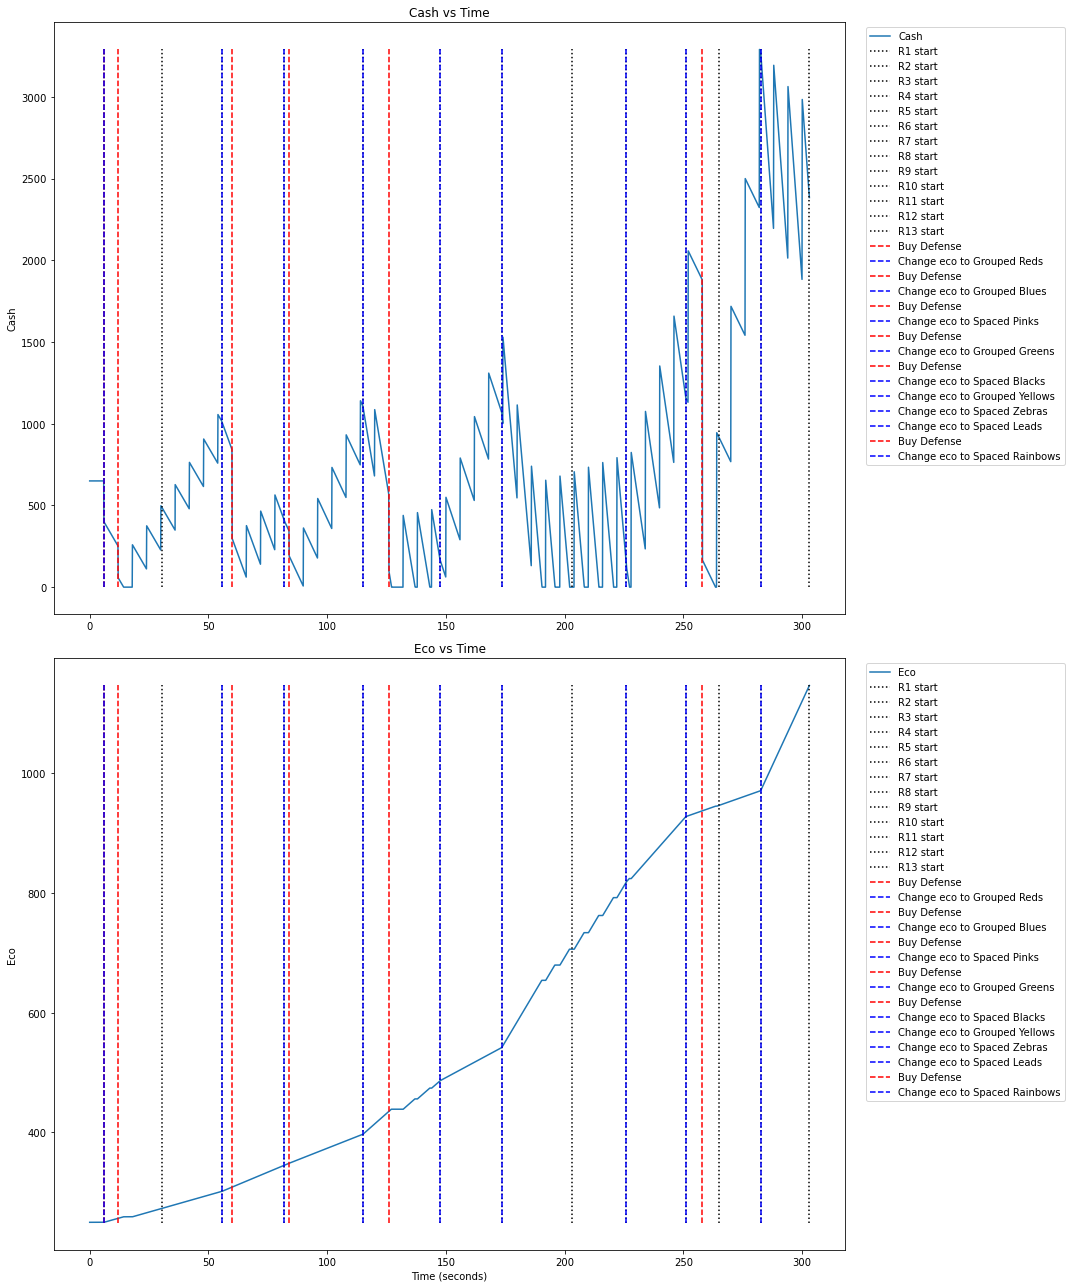

In [12]:
rounds = Rounds(0.5)

buy_queue_spoon = [
    [buyDefense(500, min_buy_time = rounds.getTimeFromRound(1))], #Buy 000 Boat
    [buyDefense(450)], #Buy Quincy
    [buyDefense(850, min_buy_time = rounds.getTimeFromRound(3))], #Upgrade boat to 011 
    [buyDefense(500, min_buy_time = rounds.getTimeFromRound(4))], #Upgrade boat to 021 
    [buyDefense(900, min_buy_time = rounds.getTimeFromRound(5.25))], #Upgrade boat to 031
    [buyDefense(2650, min_buy_time = rounds.getTimeFromRound(10))] #Buy a 300 alchemist
]

eco_queue_spoon = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'),
    (rounds.getTimeFromRound(3), 'Grouped Blues'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5), 'Grouped Greens'),
    (rounds.getTimeFromRound(6), 'Spaced Blacks'),
    (rounds.getTimeFromRound(7), 'Grouped Yellows'),
    (rounds.getTimeFromRound(9), 'Spaced Zebras'),
    (rounds.getTimeFromRound(10), 'Spaced Leads'),
    (rounds.getTimeFromRound(12), 'Spaced Rainbows')
]

initial_state = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue_spoon,
    'Eco Queue': eco_queue_spoon
}

game_state = GameState(initial_state)
game_state.fastForward(target_round=13, interval=0.1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'BAS_spoon')
print("The cash and eco at the end of the simulation is given by (%s,%s)"%(game_state.cash, game_state.eco))

# Late-Game Farming

I'm going to consider a hypothetical scenario where we are at 2500 eco in a BAS game, and we wish to eco or build boat farms in such a way that we achieve super mines right before R30. To begin, I'm going to consider some base examples:

## Eco

Naturally, our first stop to consider just what happens when we eco. We'll consider an idealized case for now where the only purchases we need to concern ourselves with is 025 permaspike and 502 super mines

The cash and eco at the end of the simulation is given by (36705.5,5501.5)


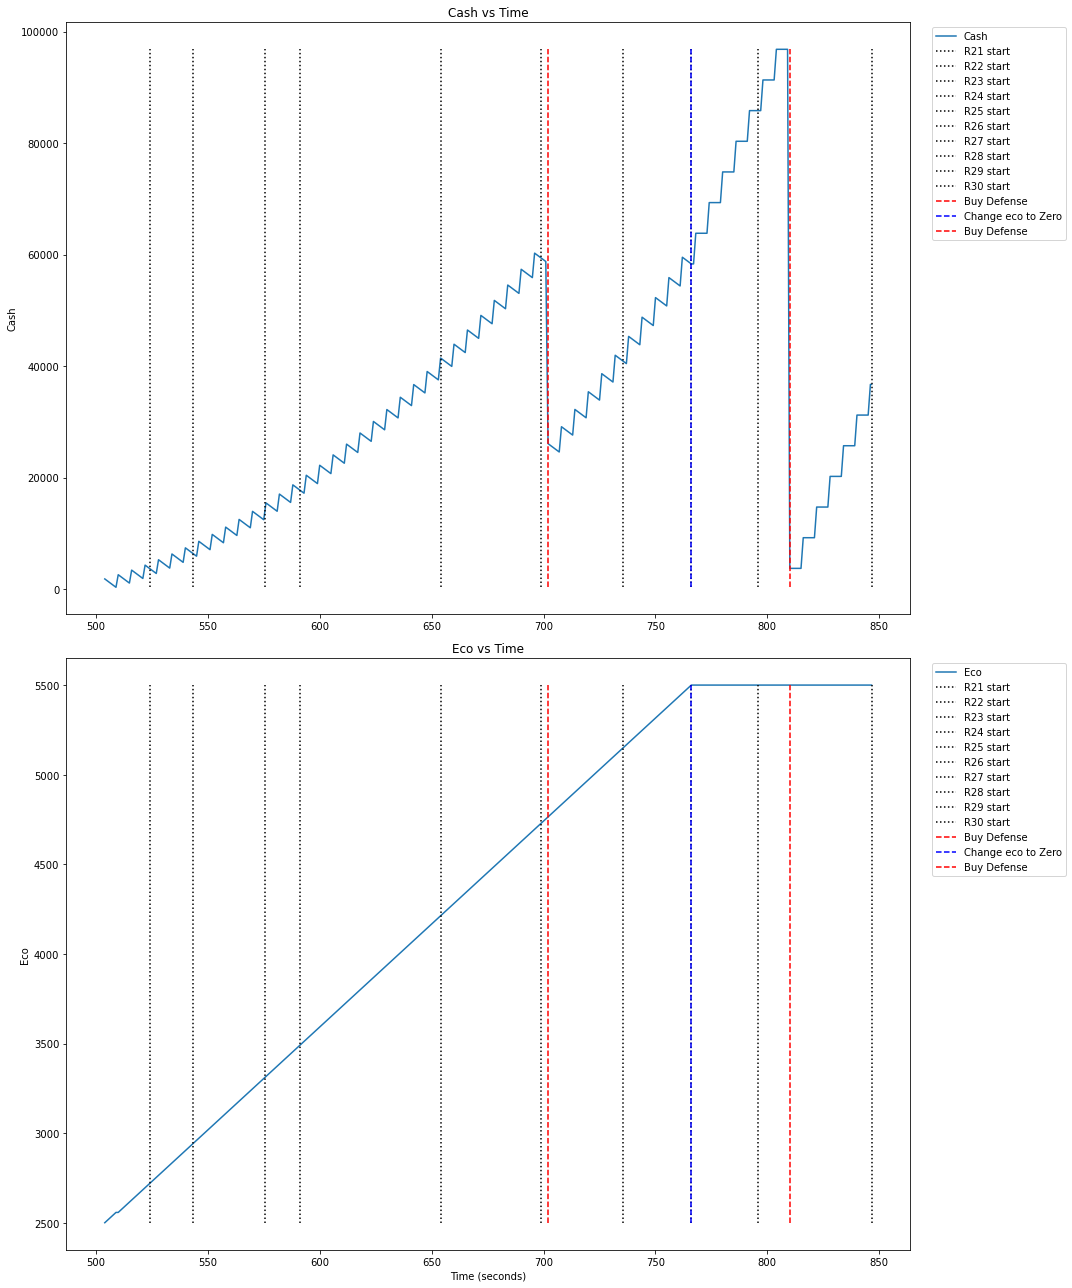

In [17]:
buy_queue_smines = [
    [buyDefense(37150, min_buy_time = rounds.getTimeFromRound(26))], #Buy 025 Permaspike
    [buyDefense(124650-26005, min_buy_time = rounds.getTimeFromRound(28))], #Sell 025 spac into 502 super mines
]

eco_queue_smines = [
    (rounds.getTimeFromRound(28), 'Zero')
]

initial_state = {
    'Cash': 1800,
    'Eco': 2500,
    'Eco Send': 'Grouped Pinks',
    'Rounds': rounds,
    'Game Round': 20,
    'Buy Queue': buy_queue_smines,
    'Eco Queue': eco_queue_smines
}

game_state = GameState(initial_state)
game_state.fastForward(target_round=30.9, interval=1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'BAS_smines_eco')
print("The cash and eco at the end of the simulation is given by (%s,%s)"%(game_state.cash, game_state.eco))


In [20]:
def boat_solver(cash):
    a = np.array([[30,65,2800],[65,100,8200],[2800,8200,0]])
    b = np.array([[-300],[-1000],[cash]])
    b_3, b_4, lam = np.linalg.solve(a,b)

    return b_3, b_4


In [21]:
boat_solver(8200)

(array([-3.88562092]), array([2.32679739]))

In [4]:
def boatIncomeCalculator(boat_tuple):
    mm = boat_tuple[0]
    ft = boat_tuple[1]
    tempire = boat_tuple[2]

    assert int(mm) == mm and mm >= 0
    assert int(ft) == ft and ft >= 0
    assert int(tempire) == tempire  and tempire >= 0 and tempire <= 1

    cost = 2800*mm + 8200*ft + 27200*tempire
    income = (1+0.05*tempire*min(20,mm+ft))*(300*mm + 1000*ft) + 3000*tempire

    return cost, income


In [12]:
boatIncomeCalculator((20,0,1))

(83200, 15000.0)

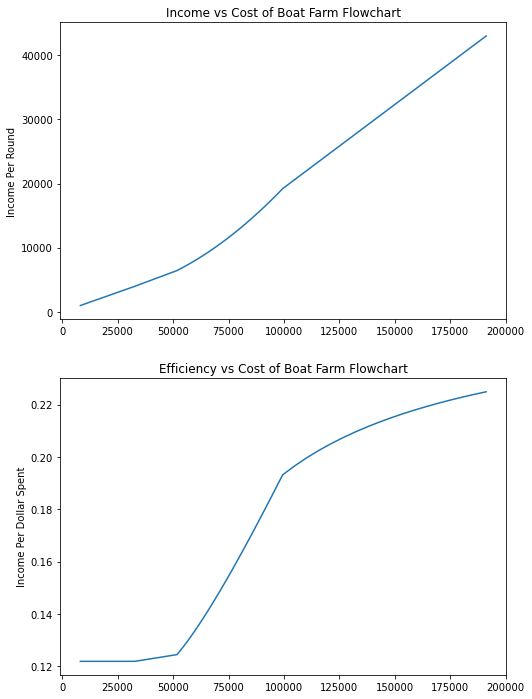

In [31]:
boat_flowchart_costs = []
boat_flowchart_incomes = []
boat_flowchart_efficiencies = []

boat_tuples = [
    (0,1,0),
    (0,2,0),
    (0,3,0),
    (0,4,0),
    (0,3,1),
    (1,3,1),
    (2,3,1),
    (3,3,1),
    (4,3,1),
    (5,3,1),
    (6,3,1),
    (7,3,1),
    (8,3,1),
    (9,3,1),
    (10,3,1),
    (11,3,1),
    (12,3,1),
    (13,3,1),
    (14,3,1),
    (15,3,1),
    (16,3,1),
    (17,3,1),
    (16,4,1),
    (15,5,1),
    (14,6,1),
    (13,7,1),
    (12,8,1),
    (11,9,1),
    (10,10,1),
    (9,11,1),
    (8,12,1),
    (7,13,1),
    (6,14,1),
    (5,15,1),
    (4,16,1),
    (3,17,1),
    (2,18,1),
    (1,19,1),
    (0,20,1),
]

for boat_tuple in boat_tuples:
    cost, income = boatIncomeCalculator(boat_tuple)
    boat_flowchart_costs.append(cost)
    boat_flowchart_incomes.append(income)
    boat_flowchart_efficiencies.append(income/cost)

fig, ax = plt.subplots(2)
ax[0].plot(boat_flowchart_costs, boat_flowchart_incomes)
ax[1].plot(boat_flowchart_costs, boat_flowchart_efficiencies)

ax[0].set_title("Income vs Cost of Boat Farm Flowchart")
ax[1].set_title("Efficiency vs Cost of Boat Farm Flowchart")

ax[0].set_ylabel("Income Per Round")
ax[1].set_ylabel("Income Per Dollar Spent")

fig.set_size_inches(8,12)


In [19]:
boatIncomeCalculator((16,4,1))

(104800, 20600.0)